### Training from the mnist database

### Load the database

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'There are {len(x_train)} sample for training.')
print(f'There are {len(x_test)} sample for test.')

Using TensorFlow backend.


There are 60000 sample for training.
There are 10000 sample for test.


### Visualize

Text(0.5, 1.0, '5')

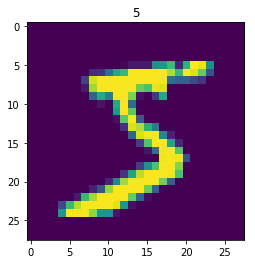

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
image = fig.add_subplot(111)
image.imshow(x_train[0])
image.set_title(y_train[0])

### Rescale

In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### Encode one hot

In [4]:
import keras

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Build the model

In [5]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation

model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activat

### Evaluate the accuracy

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100* score[1]
print(f'accuracy is: {accuracy}%')

accuracy is: 7.37%


### Train the data

In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100* score[1]
print(f'accuracy is: {accuracy}%')

accuracy is: 97.88%
